# Benefits of using the stable baselines 3 hyper-parameter zoo
In the first attempt to solve the reacher environment, the PPO, A2C, TD3 and SAC algorithms were used with the same architecture (optimized on PPO) and with a small learning rate tuning. The question is whether one can get a better performance by starting from tuned hyper parameters of a similar domain, in this case, `HalfCheetahBulletEnv-v0`. The hyper parameters were copied from the [baselines zoo](https://github.com/DLR-RM/rl-baselines3-zoo/).

Practically in all cases considered there is a clear advantage starting from those parameters and can save quite a lot of tuning time. Additionally, this gives a better chance of starting with a stable algorithm on a new problem (the first iteration till the single agent PPO converged was pretty painful!). 

**Note**: In both PPO and A2C normalization was not applied on the environment level, though suggested in the zoo. Additionally, in each case some hyper parameters were fine-tuned a bit to fit the reacher environment.

In [1]:
from utils import plot_several_experiment_curves

## PPO

In [9]:
experiments_ppo_stability = [
    ('run 1', '../experiments/ppo_multi_agent_lr_0_00003/tensorboard_logs/PPO_1/events.out.tfevents.1591561479.mariosk-G3-3590.10935.0'),
    ('run 2', '../experiments/ppo_multi_lr_0_00003_extra_1/tensorboard_logs/PPO_1/events.out.tfevents.1591727806.mariosk-G3-3590.4294.0'),
    ('run 3', '../experiments/ppo_multi_lr_0_00003_extra_2/tensorboard_logs/PPO_1/events.out.tfevents.1591727835.mariosk-G3-3590.4460.0'),
    ('run 4', '../experiments/ppo_multi_lr_0_00003_extra_3/tensorboard_logs/PPO_1/events.out.tfevents.1591732392.mariosk-G3-3590.8123.0'),
    ('run 5', '../experiments/ppo_multi_lr_0_00003_extra_4/tensorboard_logs/PPO_1/events.out.tfevents.1591732402.mariosk-G3-3590.8275.0'),
    
    ('zoo - run 1', '../experiments/zoo_ppo/tensorboard_logs/PPO_1/events.out.tfevents.1592161274.mariosk-G3-3590.3944.0'),
    ('zoo - run 2', '../experiments/zoo_ppo/tensorboard_logs/PPO_2/events.out.tfevents.1592163524.mariosk-G3-3590.5096.0'),
    ('zoo - run 3', '../experiments/zoo_ppo/tensorboard_logs/PPO_3/events.out.tfevents.1592165915.mariosk-G3-3590.8203.0')
]

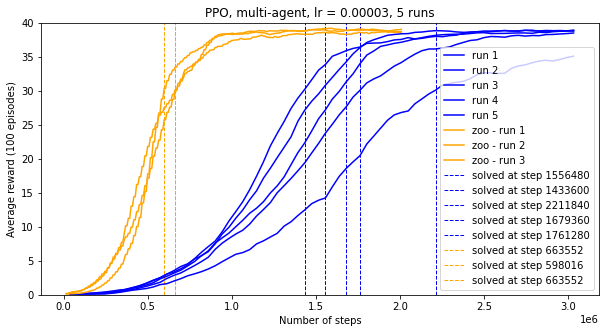

In [18]:
plot_several_experiment_curves(
    experiments_ppo_stability, 
    title='PPO, multi-agent, lr = 0.00003, 5 runs',
    save_name='ppo_zoo',
    colors=5*['blue']+3*['orange'])

## A2C

In [21]:
experiments_a2c_stability = [
    ('run 1', '../experiments/a2c_lr_0_0001/tensorboard_logs/A2C_1/events.out.tfevents.1591700422.mariosk-G3-3590.15702.0'),
    ('run 2', '../experiments/a2c_lr_0_0001_extra_1/tensorboard_logs/A2C_1/events.out.tfevents.1591718404.mariosk-G3-3590.17821.0'),
    ('run 3', '../experiments/a2c_lr_0_0001_extra_2/tensorboard_logs/A2C_1/events.out.tfevents.1591718418.mariosk-G3-3590.17996.0'),
    ('run 4', '../experiments/a2c_lr_0_0001_extra_3/tensorboard_logs/A2C_1/events.out.tfevents.1591722408.mariosk-G3-3590.30133.0'),
    ('run 5', '../experiments/a2c_lr_0_0001_extra_4/tensorboard_logs/A2C_1/events.out.tfevents.1591726369.mariosk-G3-3590.2220.0'),
    
    ('zoo - run 1',  '../experiments/zoo_a2c/tensorboard_logs/A2C_1/events.out.tfevents.1592250280.mariosk-G3-3590.3199.0'),
    ('zoo - run 2',  '../experiments/zoo_a2c/tensorboard_logs/A2C_2/events.out.tfevents.1592251202.mariosk-G3-3590.4969.0'),
    ('zoo - run 3',  '../experiments/zoo_a2c/tensorboard_logs/A2C_3/events.out.tfevents.1592252537.mariosk-G3-3590.9093.0')
]

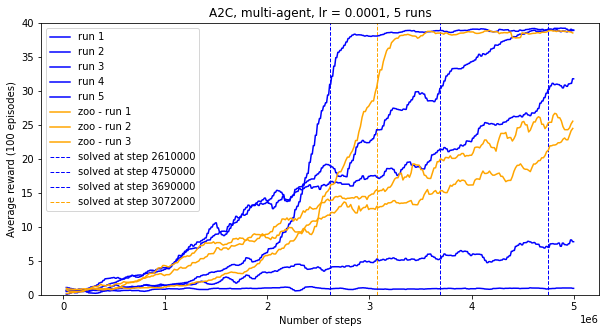

In [22]:
plot_several_experiment_curves(
    experiments_a2c_stability, 
    title='A2C, multi-agent, lr = 0.0001, 5 runs',
    save_name='a2c_zoo',
    colors=5*['blue']+3*['orange'])

## TD3

In [11]:
experiments_td3_stability = [
    ('run 1', '../experiments/td3_0_001/tensorboard_logs/TD3_1/events.out.tfevents.1591866829.mariosk-G3-3590.8276.0'),
    ('run 2', '../experiments/td3_0_001_extra_1/tensorboard_logs/TD3_1/events.out.tfevents.1591876066.mariosk-G3-3590.11426.0'),
    ('run 3', '../experiments/td3_0_001_extra_2/tensorboard_logs/TD3_1/events.out.tfevents.1591876088.mariosk-G3-3590.11576.0'),
    ('run 4', '../experiments/td3_0_001_extra_3/tensorboard_logs/TD3_1/events.out.tfevents.1591880388.mariosk-G3-3590.12917.0'),
    ('run 5', '../experiments/td3_0_001_extra_4/tensorboard_logs/TD3_1/events.out.tfevents.1591880394.mariosk-G3-3590.13066.0'),
    
    ('zoo - run 1', '../experiments/zoo_td3/tensorboard_logs/TD3_1/events.out.tfevents.1592207914.mariosk-G3-3590.19263.0'),
    ('zoo - run 2', '../experiments/zoo_td3/tensorboard_logs/TD3_2/events.out.tfevents.1592215382.mariosk-G3-3590.22229.0'),
    ('zoo - run 3', '../experiments/zoo_td3/tensorboard_logs/TD3_3/events.out.tfevents.1592222444.mariosk-G3-3590.24455.0'),
]

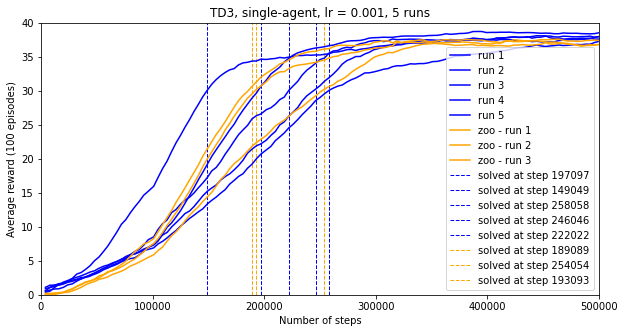

In [16]:
plot_several_experiment_curves(
    experiments_td3_stability, 
    title='TD3, single-agent, lr = 0.001, 5 runs',
    save_name='td3_zoo',
    xlim=(0, 500000),
    colors=5*['blue']+3*['orange'])

## SAC
SAC had not been tested before, but it was very easy to get the best results (in terms of number of steps till convergence) out of the box. One has to state though, that the algorithm started diverging a bit after a number of steps and early stopping needed to be applied in order to pick the best model.

In [14]:
experiments_sac_stability = [
    ('zoo - run 1', '../experiments/zoo_sac/tensorboard_logs/SAC_1/events.out.tfevents.1592161345.mariosk-G3-3590.4558.0'),
    ('zoo - run 2', '../experiments/zoo_sac/tensorboard_logs/SAC_2/events.out.tfevents.1592166980.mariosk-G3-3590.9308.0'),
    ('zoo - run 3', '../experiments/zoo_sac/tensorboard_logs/SAC_3/events.out.tfevents.1592201949.mariosk-G3-3590.5795.0'),
]

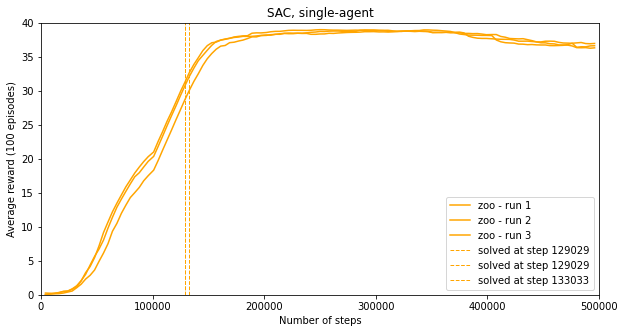

In [15]:
plot_several_experiment_curves(
    experiments_sac_stability, 
    title='SAC, single-agent',
    save_name='sac_zoo',
    xlim=(0, 500000),
    colors=3*['orange'])